# Analytical

In [43]:
n   = 200 # file number,
nr  = 638  # the radial grid in circular.par
ntheta = 1024 # the azimuthal grid number in circular.par

# ln(rmax / rmin) / 2pi * ntheta = nr

1.25 0.0


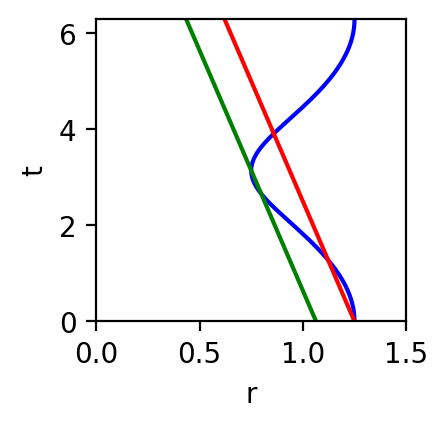

In [45]:
import math
import matplotlib.pyplot as plt
import numpy as np
import os

# os.chdir("/Users/RaymondMZhang/Downloads/fargo/out2circular")
# os.chdir("/Users/RaymondMZhang/Downloads/fargo/out2eccentricity0p1")
os.chdir("/Users/RaymondMZhang/Downloads/fargo/out2eccentricity0p25")
# os.chdir("/Users/RaymondMZhang/Downloads/fargo/out2eccentricity0p5")


# definitions
rmin = 0.2
r_p = 1.1
rmax = 3
dr = (rmax-rmin)/n
cs_p = 0.1
alpha = 1.5
beta = 0
degree = math.pi/100
dt = 0.0314159265359
plt.figure(figsize = (2, 2), dpi=200)

# reading planet data
planet = open('planet0.dat', 'r')

# arrays with all the planet's positions
planetxs = []
planetys = []

# arrays with all the planet's velocities
velocityxs = []
velocityys = []

innerpointarray = np.empty((n+1,n,2),float)
outerpointarray = np.empty((n+1,n,2),float)

time_array = []

# reading the planet0 data
for line in planet: # loop through every line in the file
    
    line = line.strip() # the strip() removes characters from both left and right 
    planet_data = line.split() # split the string into many columns]
    planet_data = np.array(planet_data)
    planet_data = planet_data.astype(float)
    
    # filling the arrays with the planet's positions
    planetxs = np.append(planetxs, planet_data[1])
    planetys = np.append(planetys, planet_data[2])
    
    # filling the arrays with the planet's velocities
    velocityxs = np.append(velocityxs, planet_data[3])
    velocityys = np.append(velocityys, planet_data[4])
    
    # filling the array with the planet times
    time_array = np.append(time_array, float(planet_data[0]) * dt)

# print(time_array)
    
phiarray = math.pi/2 - np.arctan2(planetys,planetxs) + np.arctan2(velocityys,velocityxs)
#theta_p
thetaarray = np.arctan2(planetys,planetxs)

r_p_array = (planetxs**2 + planetys**2)**0.5

velocityarray = (velocityxs**2 + velocityys**2)**0.5

omega_p_array = -velocityarray / r_p_array * np.cos(phiarray)

### test for a slow omega
# omega_p_array = np.sqrt(2)*omega_p_array/omega_p_array
# r_p_array = 1.0*r_p_array/r_p_array
# thetaarray = omega_p_array*np.arange(0,601)*dt
# plt.scatter(np.cos(thetaarray[n]), np.sin(thetaarray[n]), color = "black", marker = "o")
#############

r_c_array = (1/(omega_p_array**2))**(1/3)

theta_p_now = thetaarray[n]

C = r_c_array * omega_p_array / cs_p
a = r_p_array / r_c_array
f = beta - alpha + 1
g = beta + 1

theta_naught = - np.sign(r_p_array - r_c_array) * C * ((a**f/f - a**g/g) - (1/f - 1/g)) + thetaarray
#print(theta_naught-thetaarray,thetaarray)
#theta_naught = theta]]array
# cmapcolor = plt.get_cmap('gist_heat')
# plt.contourf(xcoord, ycoord, rho, levels = levels, cmap = cmapcolor)
for t in np.arange (1,n+1):
    
    r_inner = r_p_array[n-t] - cs_p * dt * t
    if np.abs(r_p_array[n-t] - r_c_array[n-t]) < 10.01 * cs_p / np.sqrt(1/r_p_array[n-t]**3): 
        a_inner = r_inner / r_c_array[n-t]
        theta_inner = theta_naught[n-t] + np.sign(r_inner - r_c_array[n-t]) * C[n-t] * ((a_inner**f/f - a_inner**g/g) - (1/f - 1/g)) + omega_p_array[n-t] * dt * t
        x_inner = r_inner * math.cos(theta_inner)
        y_inner = r_inner * math.sin(theta_inner)
#         plt.scatter(x_inner,y_inner, color = "cyan", s = 50. * (n-t) / n)
        
    elif (r_inner - r_c_array[n-t]) * (r_p_array[n-t] - r_c_array[n-t]) > 0: 
        a_inner = r_inner / r_c_array[n-t]
        theta_inner = theta_naught[n-t] + np.sign(r_inner - r_c_array[n-t]) * C[n-t] * ((a_inner**f/f - a_inner**g/g) - (1/f - 1/g)) + omega_p_array[n-t] * dt * t
        x_inner = r_inner * math.cos(theta_inner)
        y_inner = r_inner * math.sin(theta_inner)
#         plt.scatter(x_inner,y_inner, color = "blue", s = 50. * (n-t) / n)
    
#     if np.abs(r_p_array[n-t] - r_c_array[n-t]) < 0.5 * cs_p / np.sqrt(1/r_p_array[n-t]**3): 
#         a_inner = r_inner / r_c_array[n-t]
#         theta_inner = theta_naught[n-t] + np.sign(r_inner - r_c_array[n-t]) * C[n-t] * ((a_inner**f/f - a_inner**g/g) - (1/f - 1/g)) + omega_p_array[n-t] * dt * t
#         x_inner = r_inner * math.cos(theta_inner)
#         y_inner = r_inner * math.sin(theta_inner)
#         plt.scatter(x_inner,y_inner, color = "cyan", s = 50. * (n-t) / n)
    
    r_outer = r_p_array[n-t] + cs_p * dt * t
    if np.abs(r_p_array[n-t] - r_c_array[n-t]) < 10.01 * cs_p / np.sqrt(1/r_p_array[n-t]**3): 
        a_outer = r_outer / r_c_array[n-t]
        theta_outer = theta_naught[n-t] + np.sign(r_outer - r_c_array[n-t]) * C[n-t] * ((a_outer**f/f - a_outer**g/g) - (1/f - 1/g)) + omega_p_array[n-t] * dt * t
        x_outer = r_outer * math.cos(theta_outer)
        y_outer = r_outer * math.sin(theta_outer)
#         plt.scatter(x_outer,y_outer, color = "lime", s = 50. * (n-t) / n)
    
    elif (r_outer - r_c_array[n-t])  * (r_p_array[n-t] - r_c_array[n-t]) > 0: 
        a_outer = r_outer / r_c_array[n-t]
        theta_outer = theta_naught[n-t] + np.sign(r_outer - r_c_array[n-t]) * C[n-t] * ((a_outer**f/f - a_outer**g/g) - (1/f - 1/g)) + omega_p_array[n-t] * dt * t
        x_outer = r_outer * math.cos(theta_outer)
        y_outer = r_outer * math.sin(theta_outer)
#         plt.scatter(x_outer,y_outer, color = "green", s = 50. * (n-t) / n)

# print(r_p_array)
# plt.scatter(planetxs[n], planetys[n], color = "black", marker = "o")
plt.plot(r_p_array, time_array, color = "blue")
x = np.linspace(0,10,1000)

#pi,0.75

print(r_p_array[0],time_array[0])
plt.plot(x, - 1 / cs_p * x + 1 / cs_p * r_p_array[0] + time_array[0], color = "red")

# for i in arange(0,100,0.000000001):
#     if
plt.plot(x, - 1 / cs_p * x + 7.5 + math.pi, color = "green")

# rest of the plotting details
plt.xlim([0,1.5])
plt.ylim([0,6.283])
# plt.subplots_adjust(left=0.1, bottom=0.1, right=0.6, top=0.8)
plt.xlabel('r')
plt.ylabel('t')
plt.show()                 

In [29]:
print(r_p_array[100], time_array[100])

0.750003600022595 3.14159265359


In [36]:
print(len(r_p_array))

601


# Numerical

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'y')

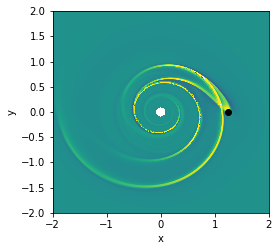

In [1]:
# read in data
import os
import math
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%pylab inline

n2   = 200 # file number,
nr  = 638  # the radial grid in circular.par
ntheta = 1024 # the azimuthal grid number in circular.par

# os.chdir("/Users/RaymondMZhang/Downloads/fargo/out2circular")
# os.chdir("/Users/RaymondMZhang/Downloads/fargo/out2eccentricity0p1")
os.chdir("/Users/RaymondMZhang/Downloads/fargo/out2eccentricity0p25")
# os.chdir("/Users/RaymondMZhang/Downloads/fargo/out2eccentricity0p5")



rho = fromfile("gasdens{0:d}.dat".format(n2), dtype='float64').reshape(nr, ntheta) #change dtype to 'float32' if your simulation is single precision
rho = np.transpose(rho)

file = open('used_rad.dat', 'r')
planet = open('planet0.dat', 'r')
rad = []

# ln(rmax / rmin) / 2pi * ntheta = nr
for line in file: # Loop through every line in the file
    line = line.strip() # The strip() removes characters from both left and right 
    columns = line.split() # Split the string into many columns
    rad = np.append(rad, float(columns[0])) # convert the column into floating numbers
    

planetxs = []
planetys = []
for line in planet: # Loop through every line in the file
    line = line.strip() # The strip() removes characters from both left and right 
    arr = line.split() # Split the string into many columns]
    arr = np.array(arr)
    arr = arr.astype(float)
    planetxs.append(arr[1])
    planetys.append(arr[2])
    

rad = (rad[1:] + rad[0:-1]) / 2. # change cell edge to cell center
theta = np.arange(0.0,2. * np.pi,2. * np.pi / ntheta)
radarr, thetaarr = np.meshgrid(rad,theta)

zmin = 0.995
zmax = 1.005
levels = np.linspace(zmin, zmax, 200)
xcoord = radarr * np.cos(thetaarr)
ycoord = radarr * np.sin(thetaarr)
plt.contourf(xcoord, ycoord, rho, levels = levels)
#plt.contourf(np.log10(rad), theta, rho, levels = levels)
#plt.plot(x,y)
plt.plot(planetxs[n2],planetys[n2], color = 'black', marker = 'o')
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.6, top=0.8)

#plt.xlim([-1.,0.5])
#plt.xlabel('log(r)')
#plt.ylim([0.,2*math.pi])
#plt.ylabel('theta')
plt.xlim([-2,2])
plt.xlabel('x')
plt.ylim([-2,2])
plt.ylabel('y')

In [ ]:

plt.contourf(np.log10(rad), theta, rho, levels = levels)
plt.plot(np.log10(np.sqrt(planetxs[n2]*planetxs[n2]+planetys[n2]*planetys[n2])),np.arctan2(planetys[n2],planetxs[n2]), color = 'black', marker = 'o')

plt.show()

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import os

os.chdir("/Users/RaymondMZhang/Downloads/fargo/outcircular")

rmin = 0.2
r_p = 1
rmax = 3
dr = (rmax-rmin)/n
print(dr)

omega_p = 1
cs_p = 0.1
alpha = 1.5
beta = 0
theta_naught = 0

for deta in np.arange (0,math.pi/9,math.pi/9):
    planetx = radius * math.cos(deta)
    planety = radius * math.sin(deta)
    plt.plot(planetx,planety, color = 'black', marker = 'o')
    
    #drawing the spirals
    
    x = []
    y = []
    for r in np.arange (rmin, rmax, 0.1):
        if r > r_p:
            C = r_p * omega_p / cs_p
            a = r / r_p
            f = beta - alpha + 1
            g = beta + 1
            theta = theta_naught + C * ((a**f/f - a**g/g) - (1/f - 1/g)) + deta
            x.append(r * math.cos(theta))
            y.append(r * math.sin(theta))
        else:
            C = r_p * omega_p / cs_p
            a = r / r_p
            f = beta - alpha + 1
            g = beta + 1
            theta = theta_naught - C * ((a**f/f - a**g/g) - (1/f - 1/g)) + deta
            x.append(r * math.cos(theta))
            y.append(r * math.sin(theta))
    plt.plot(x,y)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.6, top=0.8)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()                 

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import os

os.chdir("/Users/RaymondMZhang/Downloads/fargo/outcircular")

rmin = 0.2
r_p = 1
rmax = 3
dr = (rmax-rmin)/n
print(dr)

omega_p = 1
cs_p = 0.1
alpha = 1.5
beta = 0
theta_naught = 0

# x = np.empty((n),int)
# x = []
# y = np.empty((n),int)
# y = []

timearray = np.empty((n,n),int)
for i in np.arange(n):  # the n that incited the spiral
    for j in np.arange(n):  # the step
        timearray[i][j] = i+j
planet = open('planet0.dat', 'r')

for line in planet: # Loop through every line in the file
    line = line.strip() # The strip() removes characters from both left and right 
    arr = line.split() # Split the string into many columns]
    arr = np.array(arr)
    arr = arr.astype(float)
    if arr[0] == n:
        planetx = arr[1]
        planety = arr[2]


innerpointarray = np.empty((2*n,n,2),float)
outerpointarray = np.empty((2*n,n,2),float)

radius = planetx
for deta in np.arange (0,2*(n)*math.pi/9,math.pi/9):
    planetx = radius * math.cos(deta)
    planety = radius * math.sin(deta)
    plt.plot(planetx,planety, color = 'black', marker = 'o')
    
    #drawing the spirals
    x_inner = []
    y_inner = []
    x_outer = []
    y_outer = []
    for t in np.arange (0,n,1):
        r_inner = r_p - cs_p * t
        r_outer = r_p + cs_p * t
        C = r_p * omega_p / cs_p
        a_inner = r_inner / r_p
        a_outer = r_outer / r_p
        f = beta - alpha + 1
        g = beta + 1
        theta_inner = theta_naught - C * ((a_inner**f/f - a_inner**g/g) - (1/f - 1/g)) + deta
        theta_outer = theta_naught + C * ((a_outer**f/f - a_outer**g/g) - (1/f - 1/g)) + deta
        x_inner.append(r_inner * math.cos(theta_inner))
        y_inner.append(r_inner * math.sin(theta_inner))
        x_outer.append(r_outer * math.cos(theta_outer))
        y_outer.append(r_outer * math.sin(theta_outer))
        innerpointarray[int(deta*9/math.pi)][t][0] = (r_inner * math.cos(theta_inner))
        innerpointarray[int(deta*9/math.pi)][t][1] = (r_inner * math.sin(theta_inner))
        outerpointarray[int(deta*9/math.pi)][t][0] = (r_outer * math.cos(theta_outer))
        outerpointarray[int(deta*9/math.pi)][t][1] = (r_outer * math.sin(theta_outer))
    
#     for i in range(10):
#         print(x_inner[i], y_inner[i])
#     print("")
        
#    plt.plot(x_inner,y_inner)
#    plt.plot(x_outer,y_outer)
    
print(innerpointarray)


i = 5
for j in range(i):
    print(j,i-j)
    plt.scatter(innerpointarray[i][i-j][0],innerpointarray[i][i-j][1])
    plt.scatter(outerpointarray[i][i-j][0],outerpointarray[i][i-j][1])
        

#print(len(x), len(y))
#plt.xlim(-0.01,0.01)
#plt.ylim(-0.01,0.01)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.6, top=0.8)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()                 